#### Sensor Network Simulation 
##### *using consensus based filters*

In [34]:
# Import modules
import os
import settings.input
import settings.initialize

# Reload local modules (for testing)
import imp
imp.reload(settings.input)
imp.reload(settings.initialize)

<module 'settings.initialize' from '/Users/shiraz/repos/sensor-network-sim/settings/initialize.py'>

In [39]:
# Get input files
simulation_file = os.path.join("settings","json_files", "simulation.json")
sensor_network_file = os.path.join("settings","json_files", "default-sensor-network.json")

# Read input files
raw_data = settings.input.read_configs([simulation_file, sensor_network_file])
input_data  = settings.initialize.do_everything(raw_data)

In [40]:
import sim.target
import sim.network
import sim.history

# Reload local modules (for testing)
import imp
imp.reload(sim.target)
imp.reload(sim.network)
imp.reload(sim.history)

<module 'sim.history' from '/Users/shiraz/repos/sensor-network-sim/sim/history.py'>

In [132]:

input_data["scheme"] = "OMVF"
input_data["network"]["noise_covariances"]["3"] = [[300, 0], [0, 300]]
target = sim.target.create(input_data)
network = sim.network.create(input_data)
omvf_h = sim.history.create(network)
sim_history = omvf_h

for t in range(50):

    sim_history.add_target(target.x)

    # Simulation...
    network.make_measurements(target.x)

    network.share_info_with_neighbors()
    network.get_info_about_target(target)

    network.do_estimations()
    sim_history.add_estimates(network)

    target.update()

# sim_history.plot_xy(target=False, estimates_of="3", measurements_of="2")

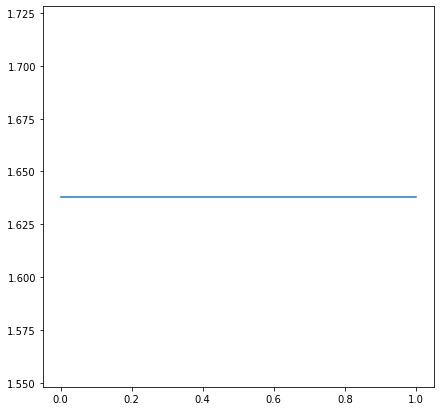

In [129]:
# sim_history.plot_timeseries(ErrCov_of="2")
# plt.plot(plot_x, plot_y)

In [127]:
# vars(network.sensors["3"])

{'id': '3', 'neighbors': ['1', '2', '4', '5'], 'Obs': array([[300,   0],
        [  0, 300]]), 'NoiseCov': array([[300,   0],
        [  0, 300]]), 'measurement': array([[25194.94493225],
        [13053.3881202 ]]), 'noise': <sim.noise.Noise at 0x12f685fd0>, 'estimate': array([[85.30141966],
        [43.9366957 ]]), 'ErrCov': array([[5.79156198e-01, 4.26614172e-19],
        [5.33859196e-19, 5.79156198e-01]]), 'estimate_prior': array([[84.95371431],
        [44.60528948]]), 'ErrCov_prior': array([[1.57915620e+00, 1.48119583e-18],
        [1.85354840e-18, 1.57915620e+00]]), 'v': array([[36.82142227],
        [18.96582298]]), 'V': array([[ 4.31662479e-01, -3.17968334e-19],
        [-3.97901266e-19,  4.31662479e-01]]), 'eps': 1.0}

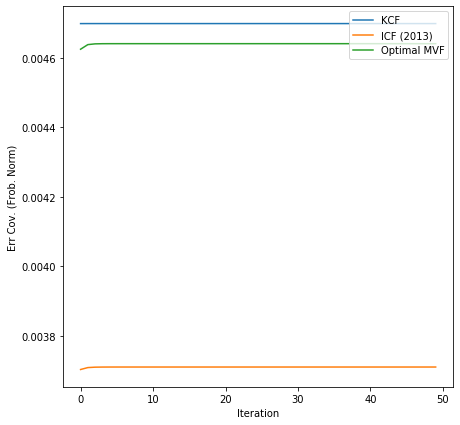

In [139]:
from matplotlib import pyplot as plt
import numpy.linalg as la
FIGURE_SIZE = (7, 7)
ErrCov_of = "3"

plt.rcParams["figure.figsize"] = FIGURE_SIZE
y_vals = [la.norm(_matrix, 'fro') for _matrix in kcf_h.sensors[ErrCov_of]["ErrCov"]]
plt.plot(y_vals, label=f"KCF")
y_vals = [la.norm(_matrix, 'fro') for _matrix in icf_h.sensors[ErrCov_of]["ErrCov"]]
plt.plot(y_vals, label=f"ICF (2013)")
y_vals = [la.norm(_matrix, 'fro') for _matrix in omvf_h.sensors[ErrCov_of]["ErrCov"]]
plt.plot(y_vals, label=f"Optimal MVF")


plt.xlabel("Iteration")
plt.ylabel("Err Cov. (Frob. Norm)")
plt.legend(loc='upper right')
plt.show()

In [7]:
input_data

{'simulation': {'total_steps': 1000},
 'target': {'constraints': {'x_initial': [100, 0]},
  'state_space': {'ss_A': array([[ 0.99996916, -0.0078539 ],
          [ 0.0078539 ,  0.99996916]]), 'ss_B': array([[1, 0],
          [0, 1]]), 'dimension': 2},
  'noise_covariance': [[1, 0], [0, 1]]},
 'network': {'indexing_style': 'matlab',
  'adjacency': [[1, 0, 1, 1, 0],
   [0, 1, 1, 0, 1],
   [1, 1, 1, 1, 1],
   [1, 0, 1, 1, 0],
   [0, 1, 1, 0, 1]],
  'observation_matrices': {'1': [[1, 0], [0, 1]],
   '2': [[1, 0], [0, 1]],
   '3': [[1, 0], [0, 1]],
   '4': [[1, 0], [0, 1]],
   '5': [[1, 0], [0, 1]]},
  'noise_covariances': {'1': [[5, 0], [0, 5]],
   '2': [[5, 0], [0, 5]],
   '3': [[5, 0], [0, 5]],
   '4': [[5, 0], [0, 5]],
   '5': [[5, 0], [0, 5]]},
  'n_sensors': 5},
 'scheme': 'OMVF'}

In [8]:
# from sim.noise import Noise
# from matplotlib.pyplot import plot, show
# x = []
# y = []
# for i in range(200):
#     a = Noise([[0.000002,0],[0,0.000002]]).sample()
#     x.append(a[0])
#     y.append(a[1])
    
# plot(x,y, 'ro')
# show()